Частина 1

In [ ]:
import numpy as np # 234
import torch

def relu(x):    
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)
 
def manual_backprop():
    """
    Для простої мережі з одним прихованим шаром:
    Input (2) → Hidden (3, ReLU) → Output (1, Linear)

    Дано:
    - X = [[0.5, -0.2]]  # вхід
    - y_true = 0.7        # ціль
    - W1 = [[0.1, 0.2, -0.3],
            [0.4, -0.5, 0.6]]
    - b1 = [0.1, -0.1, 0.2]
    - W2 = [[0.3], [-0.2], [0.5]]
    - b2 = [0.1]

    Завдання:
    1. Виконайте forward pass
    2. Обчисліть MSE loss
    3. Обчисліть всі градієнти вручну
    4. Оновіть ваги з learning_rate = 0.1
    5. Порівняйте з PyTorch autograd
    """
    X = np.array([[0.5, -0.2]])
    y_true = 0.7
    W1 = np.array([[0.1, 0.2, -0.3],
                   [0.4, -0.5, 0.6]])
    b1 = np.array([0.1, -0.1, 0.2])
    W2 = np.array([[0.3], [-0.2], [0.5]])
    b2 = np.array([0.1])

     
    # Forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    y_pred = z2 

    #loss 
    loss = np.mean((y_pred - y_true) ** 2)    
    print(f"Loss: {loss}")

    #backward pass  обчислюються похідні градієнти       

    """ BACKWARD PASS """
    # Похідна функції втрат 
    dL_dy_pred = 2 * (y_pred - y_true) # (1, 1) 

    # похідна втрат другого шару 
    dL_dW2 = a1.T @ dL_dy_pred # (3, 1)
    dL_db2 = dL_dy_pred # (1, 1)

    # як зміна виходу прихованого шару впливає на втрати
    dL_da1 = dL_dy_pred @ W2.T                 # (1, 3)
    dL_dz1 = dL_da1 * relu_derivative(z1)      # (1, 3)

    # градієнт першого шару 
    dL_dW1 = X.T @ dL_dz1                      # (2, 3)
    # бо зсув додається до виходу 
    dL_db1 = dL_dz1                            # (1, 3)

    # оновлення ваг за правилом градієнтного спуску
    learning_rate = 0.1

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1.squeeze()
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2.squeeze()

    print("Manual gradients:")
    print("dL_dW2:\n", dL_dW2)
    print("dL_dW1:\n", dL_dW1)

    # PYTORCH CHECK перевірка правильності моїх обчислень
    X_torch = torch.tensor([[0.5, -0.2]], dtype=torch.float32)
    y_torch = torch.tensor([[0.7]], dtype=torch.float32)

    W1_torch = torch.tensor([[0.1, 0.2, -0.3],
                             [0.4, -0.5, 0.6]], dtype=torch.float32, requires_grad=True)
    b1_torch = torch.tensor([0.1, -0.1, 0.2], dtype=torch.float32, requires_grad=True)

    W2_torch = torch.tensor([[0.3], [-0.2], [0.5]], dtype=torch.float32, requires_grad=True)
    b2_torch = torch.tensor([0.1], dtype=torch.float32, requires_grad=True)

    # Forward
    z1_torch = X_torch @ W1_torch + b1_torch
    a1_torch = torch.relu(z1_torch)
    y_pred_torch = a1_torch @ W2_torch + b2_torch

    loss_torch = torch.mean((y_pred_torch - y_torch) ** 2)
    loss_torch.backward()

    print("\nPyTorch autograd gradients:")
    print("W2 grad:\n", W2_torch.grad)
    print("W1 grad:\n", W1_torch.grad)

    # Сравнение
    print("W1 difference:\n", dL_dW1 - W1_torch.grad.detach().numpy())
    print("\nComparison (manual vs PyTorch):")
    print("W2 difference:\n", dL_dW2 - W2_torch.grad.detach().numpy())


manual_backprop()


Loss: 0.358801
Manual gradients:
dL_dW2:
 [[-0.08386]
 [-0.1198 ]
 [ 0.     ]]
dL_dW1:
 [[-0.1797   0.1198   0.     ]
 [ 0.07188 -0.04792  0.     ]]

PyTorch autograd gradients:
W2 grad:
 tensor([[-0.0839],
        [-0.1198],
        [ 0.0000]])
W1 grad:
 tensor([[-0.1797,  0.1198,  0.0000],
        [ 0.0719, -0.0479, -0.0000]])
W1 difference:
 [[ 2.07424164e-09  6.06775284e-09  0.00000000e+00]
 [-5.30004501e-09 -1.91926960e-10  0.00000000e+00]]

Comparison (manual vs PyTorch):
W2 difference:
 [[-4.99248504e-09]
 [-6.06775284e-09]
 [ 0.00000000e+00]]


MSE  : 0.04666666666666667 [-0.2         0.13333333 -0.06666667]
MAE  : 0.19999999999999998 [-0.33333333  0.33333333 -0.33333333]
Huber: 0.023333333333333334 [-0.1         0.06666667 -0.03333333]
BCE  : 0.22839300363692283 [-0.47619048  0.41666667 -0.37037037]
loss landscape


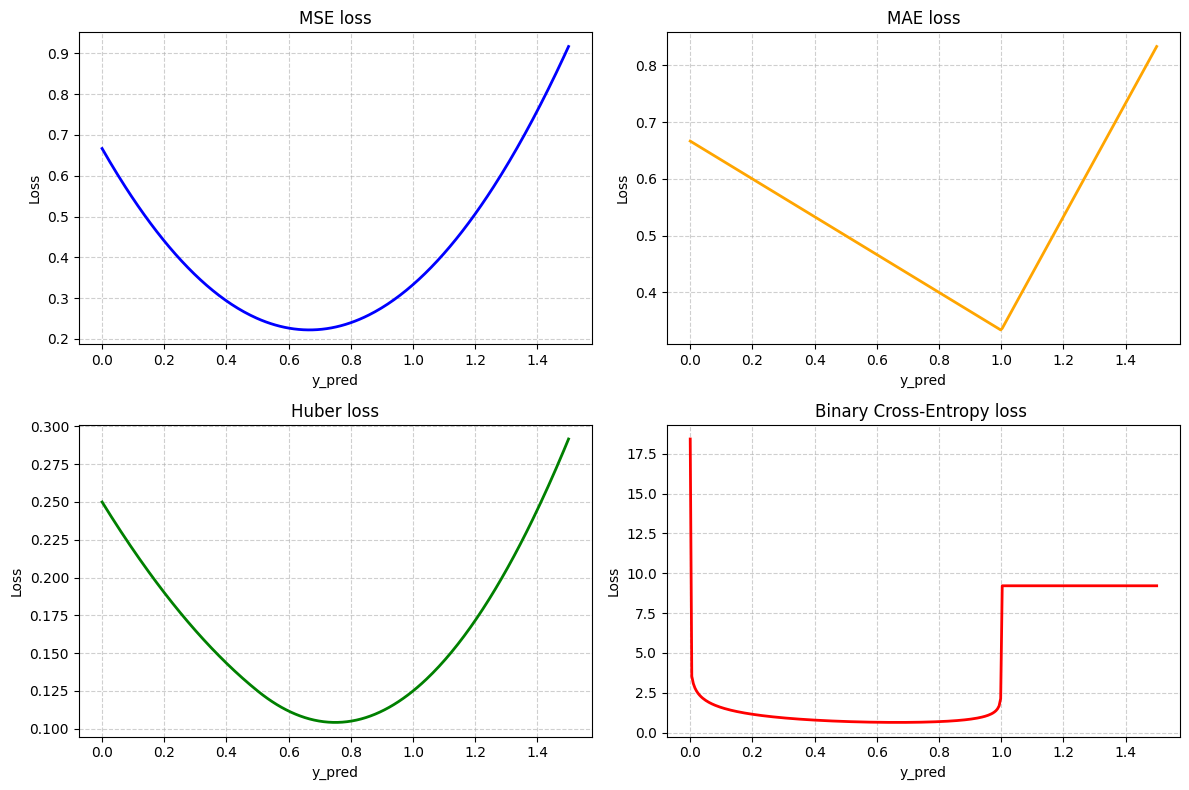

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class LossFunctions:
    """
    Реалізуйте наступні функції втрат та їх градієнти:
    1. MSE (Mean Squared Error)
    2. MAE (Mean Absolute Error)
    3. Huber Loss (комбінація MSE та MAE)
    4. Binary Cross-Entropy
    """

    @staticmethod
    def mse(y_pred, y_true): # середньоквадратична помилка
        """MSE loss та її градієнт"""
        loss = np.mean((y_pred - y_true) ** 2)
        gradient = (2 / y_true.size) * (y_pred - y_true)
        return loss, gradient

    @staticmethod
    def mae(y_pred, y_true): # середньоабсолютна помилка
        """MAE loss та її градієнт"""
        loss = np.mean(np.abs(y_pred - y_true))
        # градієнт не визначений в 0 тому sign()
        gradient = np.sign(y_pred - y_true) / y_true.size
        return loss, gradient

    @staticmethod
    def huber(y_pred, y_true, delta=1.0): # комінація MSE та MAE
        """
        Huber loss:
        L = 0.5 * (y_pred - y_true)^2,           якщо |y_pred - y_true| <= delta
        L = delta * |y_pred - y_true| - 0.5 * delta^2,  інакше
        """
        error = y_pred - y_true
        abs_error = np.abs(error) # не може бути відємним

        is_small_error = abs_error <= delta

        # втрати
        loss = np.where(is_small_error,
                        0.5 * error ** 2,
                        delta * abs_error - 0.5 * delta ** 2)
        loss = np.mean(loss)

        # граднієнт
        gradient = np.where(is_small_error,
                            error,
                            delta * np.sign(error))
        gradient = gradient / y_true.size
        return loss, gradient


    @staticmethod
    def binary_cross_entropy(y_pred, y_true): # все використовується для бінарної класифікації 0 або 1
        """BCE loss з численною стабільністю"""
        eps = 1e-12
        # np.clip щоб уникнути log(0)
        y_pred = np.clip(y_pred, eps, 1 - eps)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        gradient = (-(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))) / y_true.size
        return loss, gradient


##########################################################################
losses = LossFunctions()
y_pred = np.array([0.7, 0.2, 0.9])
y_true = np.array([1.0, 0.0, 1.0])

mse_loss, mse_grad = losses.mse(y_pred, y_true)
mae_loss, mae_grad = losses.mae(y_pred, y_true)
huber_loss, huber_grad = losses.huber(y_pred, y_true, delta=0.5)
bce_loss, bce_grad = losses.binary_cross_entropy(y_pred, y_true)

print("MSE  :", mse_loss, mse_grad)
print("MAE  :", mae_loss, mae_grad)
print("Huber:", huber_loss, huber_grad)
print("BCE  :", bce_loss, bce_grad)


print("loss landscape")
y_pred_values = np.linspace(0, 1.5, 300)

mse_vals, mae_vals, huber_vals, bce_vals = [], [], [], []
for y in y_pred_values:
    yp = np.array([y, y, y])
    mse_vals.append(losses.mse(yp, y_true)[0])
    mae_vals.append(losses.mae(yp, y_true)[0])
    huber_vals.append(losses.huber(yp, y_true, delta=0.5)[0])
    yp_clip = np.clip(yp, 1e-12, 1 - 1e-12)
    bce_vals.append(losses.binary_cross_entropy(yp_clip, y_true)[0])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(y_pred_values, mse_vals, color='blue', linewidth=2)
plt.title("MSE loss")
plt.xlabel("y_pred")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2, 2, 2)
plt.plot(y_pred_values, mae_vals, color='orange', linewidth=2)
plt.title("MAE loss")
plt.xlabel("y_pred")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2, 2, 3)
plt.plot(y_pred_values, huber_vals, color='green', linewidth=2)
plt.title("Huber loss")
plt.xlabel("y_pred")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2, 2, 4)
plt.plot(y_pred_values, bce_vals, color='red', linewidth=2)
plt.title("Binary Cross-Entropy loss ")
plt.xlabel("y_pred")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

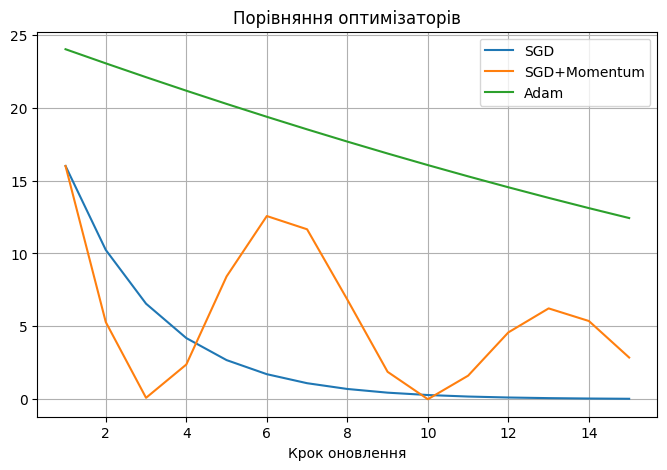

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class CustomOptimizer:
    """Базовий клас для оптимізаторів"""

    def __init__(self, params, lr=0.01):
        self.params = params  # список параметрів з .data і .grad)
        self.lr = lr

    def zero_grad(self):
        """Обнулення градієнтів перед новим кроком"""
        for param in self.params:
            param.grad = np.zeros_like(param.data)

    def step(self):
        """Оновлення параметрів (абстрактний метод)"""
        raise NotImplementedError


# SGD 
class MySGD(CustomOptimizer):
    """Stochastic Gradient Descent"""
    def step(self): # приостий градієнтний спуск 
        for param in self.params:
            param.data -= self.lr * param.grad


# SGD + Momentum 
class MySGDMomentum(CustomOptimizer):
    """SGD з Momentum"""
    def __init__(self, params, lr=0.01, momentum=0.9):
        super().__init__(params, lr) # конструктор батьківського класу можна використовувати 
        self.momentum = momentum # додаємо моментум тіпа рух
        # Ініціалізація velocity для кожного параметра
        self.velocity = [np.zeros_like(p.data) for p in self.params]

    def step(self):
        for i, param in enumerate(self.params):
            self.velocity[i] = self.momentum * self.velocity[i] - self.lr * param.grad # залишок староъ швидкості - новий градієнтний параметр 
            param.data += self.velocity[i] 


# Adam (поєжнує ідеї RMSProp і Momentum)
class MyAdam(CustomOptimizer):
    """Спрощена версія Adam"""

    def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
        super().__init__(params, lr)
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        # Ініціалізація моментів
        self.m = [np.zeros_like(p.data) for p in self.params] 
        self.v = [np.zeros_like(p.data) for p in self.params]
        self.t = 0  # лічильник кроків (для bias correction)

    def step(self):
        self.t += 1
        for i, param in enumerate(self.params):
            g = param.grad

            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * g # накопичення среднього градієнтів
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (g ** 2) # накопичує середній квадрат градієнтів 

            # корекція вагів бо вони занижені 
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)

            # адаптивний крок для кожного параметра 
            param.data -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)


class Tensor:
    """Проста обгортка для зберігання значення і градієнта"""
    def __init__(self, data):
        self.data = np.array(data, dtype=float) # значення параметру 
        self.grad = np.zeros_like(self.data) # градієнт параметру

# Тестова функція: f(w) = (w - 5)^2
def loss_fn(param):
    return np.mean((param.data - 5) ** 2)

def compute_grad(param):
    param.grad = 2 * (param.data - 5)


optimizers = {
    "SGD": MySGD([Tensor([10.0])], lr=0.1),
    "SGD+Momentum": MySGDMomentum([Tensor([10.0])], lr=0.1, momentum=0.9),
    "Adam": MyAdam([Tensor([10.0])], lr=0.1)
}

epoch = 15
plt.figure(figsize=(8, 5))

for name, opt in optimizers.items():
    w = Tensor([10.0])
    opt.params = [w]
    losses = []

    for step in range(epoch):
        compute_grad(w)
        opt.step()
        losses.append(loss_fn(w))

    plt.plot(range(1, epoch+1), losses, label=name,)

plt.title("Порівняння оптимізаторів")
plt.xlabel("Крок оновлення")
# plt.ylabel("Loss (f(w) = (w-5)^2)")
plt.legend()
plt.grid(True)
plt.show()


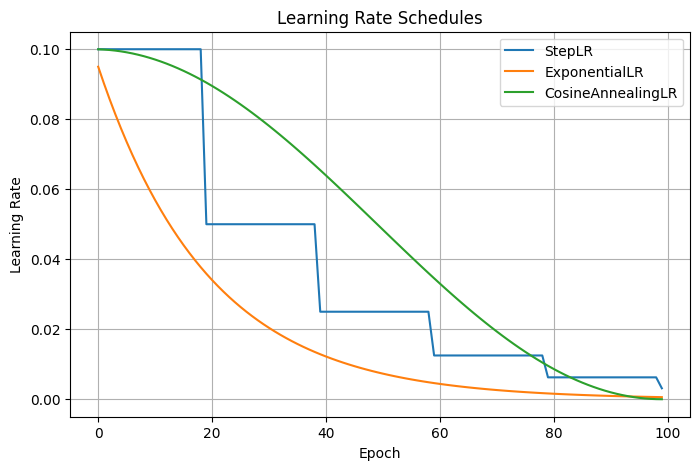

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LRScheduler:
    """Базовий клас для LR scheduler"""
    def __init__(self, optimizer, initial_lr):
        self.optimizer = optimizer
        self.initial_lr = initial_lr
        self.current_lr = initial_lr
        self.epoch = 0

    def step(self):
        """Оновити learning rate"""
        self.epoch += 1
        new_lr = self.compute_lr()
        self.update_optimizer_lr(new_lr)
        return new_lr

    def compute_lr(self):
        """Обчислити новий LR"""
        raise NotImplementedError

    def update_optimizer_lr(self, new_lr):
        """Оновити LR в оптимізаторі"""
        self.current_lr = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr


#  StepLR
class StepLRScheduler(LRScheduler):
    """Зменшує LR кожні step_size епох"""
    def __init__(self, optimizer, initial_lr, step_size=30, gamma=0.1):
        super().__init__(optimizer, initial_lr)
        self.step_size = step_size
        self.gamma = gamma

    def compute_lr(self):
        # lr = initial_lr * (gamma ^ floor(epoch / step_size))
        return self.initial_lr * (self.gamma ** (self.epoch // self.step_size))


# ExponentialLR
class ExponentialLRScheduler(LRScheduler):
    """Експоненційне зменшення LR"""
    def __init__(self, optimizer, initial_lr, decay_rate=0.95):
        super().__init__(optimizer, initial_lr)
        self.decay_rate = decay_rate

    def compute_lr(self):
        # lr = initial_lr * decay_rate^epoch
        return self.initial_lr * (self.decay_rate ** self.epoch)


# CosineAnnealingLR 
class CosineAnnealingScheduler(LRScheduler):
    """Косинусне зменшення LR"""
    def __init__(self, optimizer, initial_lr, T_max):
        super().__init__(optimizer, initial_lr)
        self.T_max = T_max

    def compute_lr(self):
        # lr = initial_lr * (1 + cos(pi * epoch / T_max)) / 2
        return self.initial_lr * (1 + np.cos(np.pi * self.epoch / self.T_max)) / 2

# Фейковий оптимізатор (імітує PyTorch-стиль)
class DummyOptimizer:
    def __init__(self, lr):
        self.param_groups = [{'lr': lr}]

# Ініціалізація
optimizer = DummyOptimizer(lr=0.1)
epochs = 100

schedulers = {
    "StepLR": StepLRScheduler(optimizer, initial_lr=0.1, step_size=20, gamma=0.5),
    "ExponentialLR": ExponentialLRScheduler(optimizer, initial_lr=0.1, decay_rate=0.95),
    "CosineAnnealingLR": CosineAnnealingScheduler(optimizer, initial_lr=0.1, T_max=100),
}

# Візуалізація
plt.figure(figsize=(8, 5))

for name, scheduler in schedulers.items():
    lrs = []
    for _ in range(epochs):
        lr = scheduler.step()
        lrs.append(lr)
    plt.plot(lrs, label=name)

plt.title("Learning Rate Schedules")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend()
plt.grid(True)
plt.show()


Частина 2

In [ ]:
def learning_rate_finder(model, train_loader, start_lr=1e-7, end_lr=10):
    """
    Реалізуйте LR finder:
    1. Почніть з дуже малого LR
    2. Поступово збільшуйте LR після кожного батчу
    3. Записуйте loss для кожного LR
    4. Зупиніться, коли loss почне вибухати
    5. Знайдіть точку з найбільшим спадом (derivative)

    Поверніть:
    - список learning rates
    - список losses
    - рекомендований lr
    """

    model_copy = copy.deepcopy(model)  # Не змінюємо оригінальну модель
    optimizer = torch.optim.SGD(model_copy.parameters(), lr=start_lr)

    lrs = []
    losses = []

    # Експоненційне збільшення lr
    num_batches = len(train_loader)
    lr_mult = (end_lr / start_lr) ** (1 / num_batches)

    # Ваш код тут
    # Підказка: слідкуйте за smoothed loss для стабільності

    # Знайдіть оптимальний LR
    # (точка з найбільшим негативним градієнтом на log scale)

    return lrs, losses, optimal_lr

# Візуалізуйте результати з логарифмічною шкалою для LR

In [ ]:
def analyze_gradient_clipping():
    """
    Експеримент з gradient clipping:
    1. Створіть "погану" модель схильну до exploding gradients
       (глибока мережа з поганою ініціалізацією)
    2. Навчіть без clipping - покажіть проблему
    3. Навчіть з різними значеннями max_norm (0.5, 1.0, 5.0, 10.0)
    4. Порівняйте криві навчання
    5. Знайдіть оптимальне значення max_norm
    """

    # Створіть "проблемну" модель
    class ProblematicModel(nn.Module):
        def __init__(self):
            super().__init__()
            # Глибока мережа з великими початковими вагами
            layers = []
            for _ in range(10):  # 10 шарів!
                layers.append(nn.Linear(50, 50))
                layers.append(nn.ReLU())
            self.network = nn.Sequential(*layers)

            # Погана ініціалізація
            for layer in self.network:
                if isinstance(layer, nn.Linear):
                    layer.weight.data *= 10  # Занадто великі ваги!

        def forward(self, x):
            return self.network(x)

    # Навчіть з різними max_norm
    results = {}
    for max_norm in [None, 0.5, 1.0, 5.0, 10.0]:
        # Ваш код
        # Зберігайте loss curves та gradient norms
        pass

    # Візуалізуйте порівняння
    return results

In [ ]:
def overfitting_experiment():
    """
    Створіть експеримент для демонстрації overfitting:

    1. Використайте маленький датасет (100 прикладів)
    2. Створіть занадто велику модель (1000+ параметрів)
    3. Навчіть до повного overfitting
    4. Застосуйте різні методи боротьби:
       - Early stopping
       - Зменшення розміру моделі
       - Додавання шуму до даних
    5. Порівняйте результати
    """

    # Генеруємо маленький датасет
    from sklearn.datasets import make_moons
    X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

    # Занадто велика модель
    class OverfittingModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Linear(2, 100),
                nn.ReLU(),
                nn.Linear(100, 100),
                nn.ReLU(),
                nn.Linear(100, 50),
                nn.ReLU(),
                nn.Linear(50, 2)
            )

        def forward(self, x):
            return self.layers(x)

    # Методи боротьби з overfitting
    methods = {
        'baseline': {},  # Без регуляризації
        'early_stopping': {'patience': 5},
        'smaller_model': {'hidden_size': 10},
        'noise_injection': {'noise_std': 0.1}
    }

    # Навчіть і порівняйте
    # Візуалізуйте decision boundaries

    return results

Частина 3

In [ ]:
class Value:
    """
    Мінімальний autograd engine (як у micrograd Karpathy)
    """
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        # Реалізуйте множення з правильним backward pass
        pass

    def relu(self):
        # Реалізуйте ReLU
        pass

    def backward(self):
        """Backpropagation через граф"""
        # Topological sort
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for v in reversed(topo):
            v._backward()

# Тест: побудуйте просту мережу використовуючи Value
# Порівняйте градієнти з PyTorch

In [ ]:
class MetaLearner(nn.Module):
    """
    Мета-мережа яка передбачає оптимальний learning rate
    базуючись на поточному стані навчання
    """

    def __init__(self, input_features=10):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_features, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()  # LR в діапазоні [0, 1]
        )

    def extract_features(self, model, loss_history, grad_history):
        """
        Витягує ознаки поточного стану навчання:
        - Поточний loss
        - Зміна loss за останні k кроків
        - Норма градієнтів
        - Variance градієнтів
        - Епоха
        - тощо
        """
        features = []

        # Ваш код для витягування ознак
        # Наприклад:
        # features.append(loss_history[-1])
        # features.append(np.std(loss_history[-10:]))
        # ...

        return torch.tensor(features)

    def forward(self, features):
        """Передбачає оптимальний LR"""
        return self.network(features) * 0.1  # Масштабуємо до [0, 0.1]

def train_meta_learner():
    """
    Навчіть meta-learner:
    1. Навчіть багато моделей з різними фіксованими LR
    2. Зберігайте який LR був оптимальним на кожному кроці
    3. Навчіть meta-learner передбачати оптимальний LR
    4. Протестуйте на новій задачі
    """
    # Ваша реалізація
    pass